In [1]:
##Importing the needed python libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

import pickle

In [2]:
##Loading the dataset
df = pd.read_csv('datasets_117_1001_responses.csv')

In [3]:
##Expanding the columns dataframe visuals
pd.options.display.max_columns=None

In [4]:
##Visualizing the dataset
df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.

### Preprocessing Segment

In [5]:
##Dropping 'NA' values from the dataset
df = df.dropna()

In [6]:
##Creating a checkpoint for the dataset
survey_df = df.copy()

In [7]:
smoking = ['never smoked', 'tried smoking', 'former smoker', 'current smoker']


In [59]:
##Converting from category to integer
survey_df['Smoking'] = df.Smoking.astype('category',categories=smoking).cat.codes

In [9]:
##Extracting categorical variables
print(survey_df['Alcohol'].unique())
print(survey_df['Punctuality'].unique())
print(survey_df['Lying'].unique())
print(survey_df['Internet_usage'].unique())
print(survey_df['Gender'].unique())
print(survey_df['Left_right_handed'].unique())
print(survey_df['Education'].unique())
print(survey_df['Only_child'].unique())
print(survey_df['Village_town'].unique())
print(survey_df['House_block_of_flats'].unique())

['drink a lot' 'social drinker' 'never']
['i am always on time' 'i am often early' 'i am often running late']
['never' 'sometimes' 'everytime it suits me'
 'only to avoid hurting someone']
['few hours a day' 'less than an hour a day' 'most of the day']
['female' 'male']
['right handed' 'left handed']
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil']
['no' 'yes']
['village' 'city']
['block of flats' 'house/bungalow']


In [10]:
alcohol=['drink a lot', 'social drinker', 'never']
punctuality=['i am always on time' ,'i am often early', 'i am often running late']
lying=['never' ,'sometimes' ,'only to avoid hurting someone','everytime it suits me']
internet=['few hours a day' ,'most of the day' ,'less than an hour a day','no time at all']
gender=['female' ,'male']
left_right_handed=['right handed' ,'left handed']
education=['college/bachelor degree' ,'secondary school','primary school','masters degree' ,'doctorate degree' ,'currently a primary school pupil']
only_child=['no' ,'yes']
village_town=['village', 'city']
house_block_of_flats=['block of flats' ,'house/bungalow']

In [11]:
##Converting categoricalvalue to integers
survey_df['Alcohol'] = df.Alcohol.astype('category',categories=alcohol).cat.codes
survey_df['Punctuality'] = df.Punctuality.astype('category',categories=punctuality).cat.codes
survey_df['Lying'] = df.Lying.astype('category',categories=lying).cat.codes
survey_df['Internet_usage'] = df.Internet_usage.astype('category',categories=internet).cat.codes
survey_df['Education'] = df.Education.astype('category',categories=education).cat.codes
survey_df['Gender'] = df.Gender.astype('category',categories=gender).cat.codes
survey_df['Left_right_handed'] = df.Left_right_handed.astype('category',categories=left_right_handed).cat.codes
survey_df['Only_child'] = df.Only_child.astype('category',categories=only_child).cat.codes
survey_df['Village_town'] = df.Village_town.astype('category',categories=village_town).cat.codes
survey_df['House_block_of_flats'] = df.House_block_of_flats.astype('category',categories=house_block_of_flats).cat.codes

In [12]:
##New dataset with only numbers
survey_df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,1,1,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.

In [13]:
##Creating a check point for new dataset
clean_df = survey_df.copy()

In [15]:
##Exporting dataset as .csv file to be saved locally on desktop.
clean_df.to_csv (r'C:\Users\obehi\Desktop\Young people survey.csv',index = False, header = True )

### Descriptive Analytics

In [16]:
##Grouping average ratings for each variable by 'Dance' music likeness type
Dance_music = clean_df.groupby(['Dance']).mean()

In [17]:
##Dataset visualization
Dance_music.head()

,Music,Slow_songs_or_fast_songs,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Dance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.676471,3.220588,2.058824,2.014706,3.161765,2.308824,2.264706,3.882353,3.073529,2.588235,1.779412,2.205882,2.264706,3.044118,3.014706,1.955882,1.514706,2.308824,4.588235,2.617647,3.294118,4.250000,2.985294,2.926471,3.397059,3.647059,3.794118,3.750000,2.205882,3.338235,3.558824,3.161765,2.779412,2.073529,1.882353,4.044118,2.897059,2.250000,2.323529,1.838235,3.470588,3.235294,3.661765,2.279412,2.102941,2.102941,2.588235,2.205882,3.794118,1.823529,2.529412,2.117647,3.235294,2.705882,1.882353,1.750000,2.544118,3.014706,3.132353,4.191176,2.323529,3.176471,1.647059,1.691176,2.235294,2.485294,3.073529,2.852941,1.970588,2.191176,2.750000,2.764706,1.294118,0.970588,2.735294,2.926471,2.558824,2.867647,2.897059,3.544118,2.294118,3.779412,4.029412,2.735294,3.779412,3.117647,2.220588,2.661765,3.279412,3.264706,3.602941,3.941176,1.911765,3.735294,2.147059,2.529412,4.147059,4.088235,2.985294,3.588235,2.955882,2.794118,2.941176,3.279412,2.073529,3.073529,0.911765,1.500000,2.691176,3.455882,3.352941,3.323529,2.794118,2.955882,3.250000,3.367647,3.352941,3.117647,3.161765,3.441176,3.220588,2.867647,3.514706,3.220588,3.250000,3.117647,3.132353,3.632353,3.426471,3.132353,2.691176,0.367647,3.132353,2.661765,2.852941,3.176471,2.647059,2.647059,3.558824,19.941176,175.044118,66.029412,1.308824,0.426471,0.117647,1.088235,0.220588,0.764706,0.308824
2.0,4.710526,3.190789,2.210526,2.177632,3.184211,2.842105,3.006579,4.190789,2.776316,2.861842,2.421053,2.776316,2.960526,3.401316,3.282895,2.407895,1.776316,2.407895,4.565789,2.611842,3.296053,4.453947,3.276316,3.263158,3.236842,3.559211,3.565789,3.710526,2.118421,3.467105,3.315789,3.223684,2.769737,2.447368,2.105263,4.230263,3.256579,2.592105,2.480263,2.046053,3.453947,3.138158,3.868421,2.460526,2.335526,2.546053,2.763158,2.111842,3.506579,1.921053,2.381579,2.046053,3.296053,3.065789,1.809211,2.177632,2.973684,3.421053,2.980263,4.421053,2.802632,3.315789,2.006579,1.828947,2.171053,2.539474,2.506579,2.736842,2.032895,2.453947,2.87

In [18]:
##Creating new datframe consisting of only 'high' and 'low' likeness rating for dance music type
df1 = Dance_music.iloc[:1,:]
df2 = Dance_music.iloc[4:,:]
df3 = pd.concat([df1, df2])

In [19]:
df3 

,Music,Slow_songs_or_fast_songs,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Dance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.676471,3.220588,2.058824,2.014706,3.161765,2.308824,2.264706,3.882353,3.073529,2.588235,1.779412,2.205882,2.264706,3.044118,3.014706,1.955882,1.514706,2.308824,4.588235,2.617647,3.294118,4.250000,2.985294,2.926471,3.397059,3.647059,3.794118,3.750000,2.205882,3.338235,3.558824,3.161765,2.779412,2.073529,1.882353,4.044118,2.897059,2.250000,2.323529,1.838235,3.470588,3.235294,3.661765,2.279412,2.102941,2.102941,2.588235,2.205882,3.794118,1.823529,2.529412,2.117647,3.235294,2.705882,1.882353,1.750000,2.544118,3.014706,3.132353,4.191176,2.323529,3.176471,1.647059,1.691176,2.235294,2.485294,3.073529,2.852941,1.970588,2.191176,2.750000,2.764706,1.294118,0.970588,2.735294,2.926471,2.558824,2.867647,2.897059,3.544118,2.294118,3.779412,4.029412,2.735294,3.779412,3.117647,2.220588,2.661765,3.279412,3.264706,3.602941,3.941176,1.911765,3.735294,2.147059,2.529412,4.147059,4.088235,2.985294,3.588235,2.955882,2.794118,2.941176,3.279412,2.073529,3.073529,0.911765,1.500000,2.691176,3.455882,3.352941,3.323529,2.794118,2.955882,3.250000,3.367647,3.352941,3.117647,3.161765,3.441176,3.220588,2.867647,3.514706,3.220588,3.250000,3.117647,3.132353,3.632353,3.426471,3.132353,2.691176,0.367647,3.132353,2.661765,2.852941,3.176471,2.647059,2.647059,3.558824,19.941176,175.044118,66.029412,1.308824,0.426471,0.117647,1.088235,0.220588,0.764706,0.308824
5.0,4.920455,3.602273,2.443182,2.465909,2.897727,3.215909,4.102273,3.625000,1.954545,2.056818,3.659091,2.897727,2.863636,3.227273,2.647727,3.420455,3.125000,2.215909,4.806818,2.829545,3.500000,4.670455,3.886364,3.204545,3.261364,3.863636,3.897727,3.659091,2.181818,3.670455,3.034091,3.102273,2.602273,2.431818,2.227273,4.272727,3.227273,2.863636,2.625000,2.159091,3.011364,3.022727,3.920455,2.556818,2.352273,2.886364,2.579545,2.170455,3.704545,3.011364,2.215909,1.738636,3.522727,3.761364,1.863636,2.784091,3.727273,3.250000,2.988636,4.840909,3.272727,3.556818,2.045455,2.034091,2.329545,2.670455,2.886364,3.068182,2.636364,2.670455,2.88

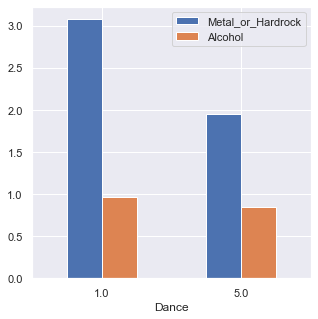

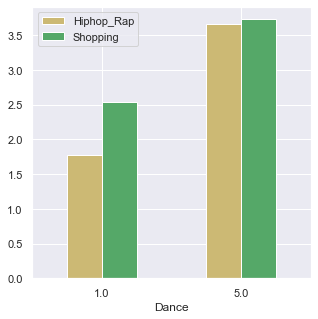

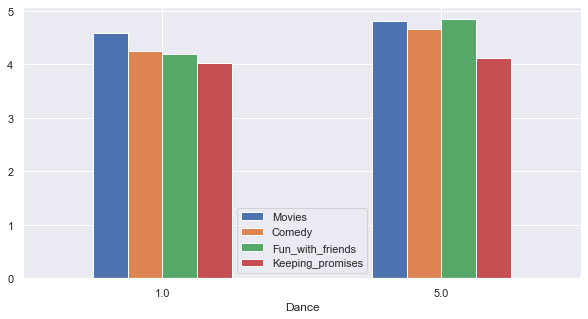

In [20]:
##Plotting a bar chart to  visualize some variables
## barplot & barplot2 represents variables that are most dissimilar between the two groups, while;
## barplot3 represents variable with a rating of at least '4.0' for both groups
barplot = df3.plot.bar(y=(['Metal_or_Hardrock','Alcohol']), rot=0, figsize=(5,5))
barplot2 = df3.plot.bar(y=(['Hiphop_Rap','Shopping']), rot=0, color=('y','g'),figsize=(5,5))
barplot3 = df3.plot.bar(y=(['Movies','Comedy','Fun_with_friends','Keeping_promises']), rot=0, figsize=(10,5))

In [21]:
##Exporting the datafarme to .csv file tobe used outside of jupyter
Dance_music.to_csv (r'C:\Users\obehi\Desktop\Biintel\Dance_music.csv',index = True, header = True )

In [22]:
##Grouping average ratings for each variable by gender
Gender_class = survey_df.groupby(['Gender']).mean()

In [23]:
Gender_class

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.815920,3.241294,3.156716,2.308458,2.027363,2.972637,3.042289,3.619403,3.758706,2.141791,2.368159,2.796020,2.753731,2.788557,3.146766,2.883085,3.136816,2.164179,2.186567,4.649254,2.564677,3.184080,4.527363,3.902985,2.776119,2.746269,4.079602,4.019900,3.495025,1.758706,3.141791,3.121891,3.315920,2.415423,2.179104,1.776119,4.057214,2.611940,2.597015,2.805970,2.201493,3.681592,3.059701,4.039801,2.609453,2.216418,2.121891,2.860697,2.288557,3.723881,2.805970,2.340796,1.982587,3.223881,2.995025,2.049751,2.569652,3.718905,2.868159,3.390547,4.574627,2.691542,3.544776,2.121891,2.233831,2.599502,2.589552,3.238806,3.261194,2.634328,2.699005,3.201493,2.950249,1.308458,0.915423,3.069652,2.990050,2.691542,3.340796,3.052239,3.370647,2.676617,3.880597,4.007463,2.689055,3.873134,3.099502,2.052239,2.325871,3.318408,3.442786,3.691542,4.052239,1.942786,4.109453,2.077114,3.106965,4.223881,4.126866,2.977612,3.718905,3.293532,2.947761,3.417910,3.286070,2.094527,3.291045,0.920398,1.427861,2.634328,3.465174,3.432836,3.684080,3.176617,2.970149,3.069652,3.773632,3.430348,3.131841,3.417910,3.656716,3.519900,3.676617,3.659204,3.601990,2.808458,3.233831,2.945274,3.631841,3.412935,3.323383,2.89801,0.445274,3.146766,3.470149,2.823383,3.017413,3.231343,2.559701,3.524876,20.052239,167.810945,58.669154,1.266169,0.082090,1.064677,0.246269,0.726368,0.385572
1,4.683824,3.375000,2.963235,2.198529,2.250000,2.996324,2.341912,3.202206,3.830882,2.669118,2.566176,3.018382,2.790441,2.716912,3.187500,2.875000,2.334559,2.514706,2.121324,4.625000,2.992647,3.647059,4.496324,2.838235,3.643382,3.841912,3.334559,3.488971,3.841912,2.602941,4.169118,3.386029,2.878676,2.952206,2.724265,2.577206,4.378676,3.889706,2.738971,2.378676,2.036765,2.496324,3.191176,3.492647,2.308824,2.257353,3.411765,2.250000,2.143382,3.437500,1.797794,2.235294,1.713235,3.650735,3.613971,1.621324,1.963235,2.599265,3.882353,2.488971,4.518382,3.194853,3.007353,1.797794,1.496324,1.746324,2.551471,2.272059,2.654412,2.044118,2.286765,

In [24]:
##Slicing the datframe to show only portion of 'Fears' for males 
male_gender = Gender_class.iloc[1:,63:73]
male_gender

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking
Gender,,,,,,,,,,
1,1.797794,1.496324,1.746324,2.551471,2.272059,2.654412,2.044118,2.286765,2.709559,2.613971


In [25]:
##Slicing the datframe to show only portion of 'Fears' for females
female_gender = Gender_class.iloc[:1,63:73]
female_gender

,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking
Gender,,,,,,,,,,
0,2.121891,2.233831,2.599502,2.589552,3.238806,3.261194,2.634328,2.699005,3.201493,2.950249


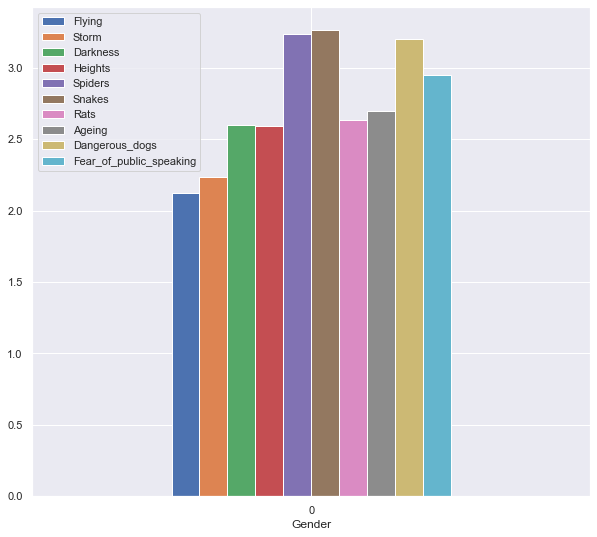

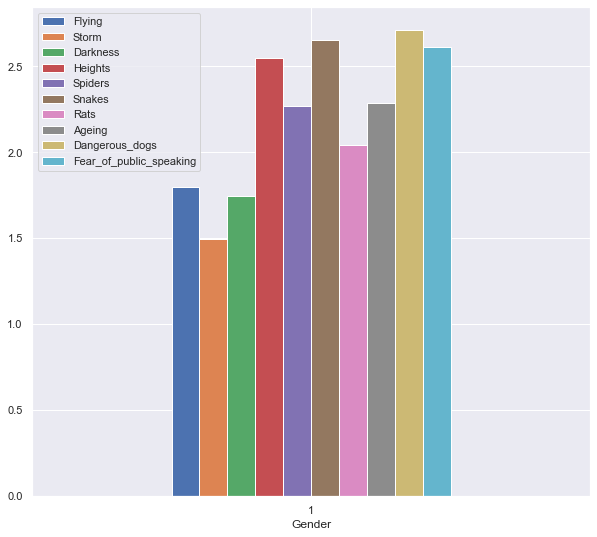

In [26]:
##Ploting both dataframes to gain some insights on the fears of both groups
##First chart represents the females participant, while te second represents the male group of survey participants
female_plot = female_gender.plot.bar(rot=0, figsize=(10,9))
male_plot = male_gender.plot.bar(rot=0, figsize=(10,9))

### Clustering/Segmentation

In [27]:
##Standardizing the datset
scaler = StandardScaler()
clean_df_std = scaler.fit_transform(clean_df)

In [28]:
##Creating and applying hierarchical clusting
hier_clust = linkage(clean_df_std, method='ward')

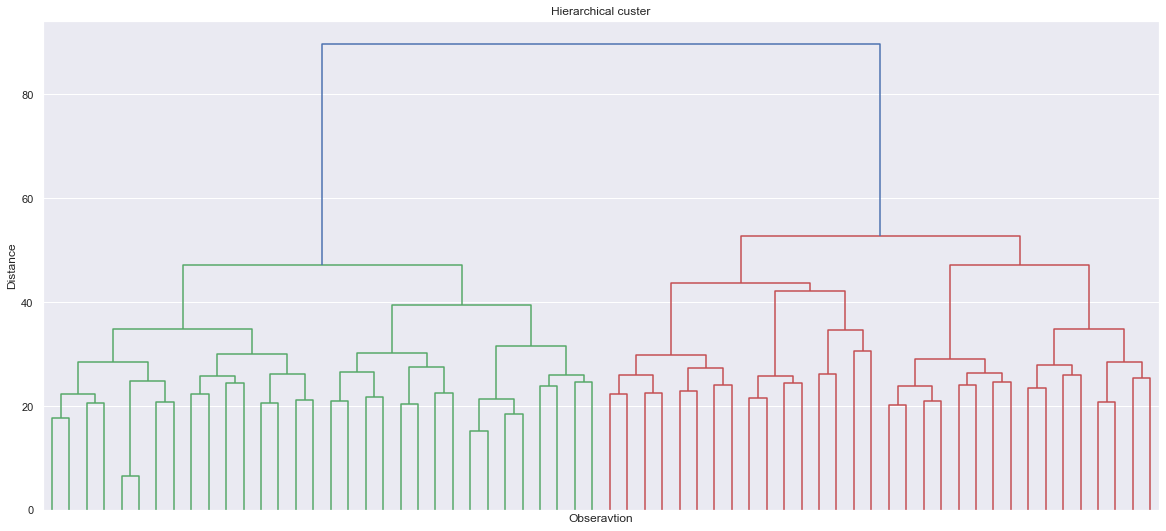

In [29]:
##Ploting the the result
plt.figure(figsize=(20,9))
plt.title('Hierarchical custer')
plt.xlabel('Obseravtion')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode = 'level',
          p=5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

In [43]:
##Creating and applying Kmeans clustering
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

In [44]:
kmeans.fit(clean_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [45]:
##Creating another checkpoint
df_segm_kmeans = clean_df.copy()

In [46]:
##Distributing survey participants into clusters using the Kmeans clustering result
df_segm_kmeans['segment K-means'] = kmeans.labels_

In [47]:
df_segm_kmeans.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,segment K-means
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0,1
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,1,1,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.

In [48]:
##Grouping particiants in the survey by Kmeans clusters
df_segm_analysis = df_segm_kmeans.groupby(['segment K-means']).mean()

In [49]:
df_segm_analysis.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.818878,3.216837,3.176020,2.329082,2.038265,3.022959,3.079082,3.660714,3.737245,2.076531,2.326531,2.770408,2.729592,2.826531,3.186224,2.885204,3.160714,2.145408,2.214286,4.642857,2.489796,3.137755,4.543367,3.943878,2.765306,2.719388,4.127551,4.035714,3.487245,1.721939,3.119898,3.102041,3.295918,2.390306,2.114796,1.742347,4.033163,2.579082,2.558673,2.854592,2.211735,3.665816,3.033163,4.017857,2.650510,2.170918,2.081633,2.872449,2.323980,3.737245,2.839286,2.400510,2.012755,3.221939,3.005102,2.107143,2.607143,3.742347,2.877551,3.420918,4.584184,2.599490,3.579082,2.178571,2.278061,2.645408,2.686224,3.275510,3.367347,2.719388,2.757653,3.298469,2.941327,1.275510,0.923469,3.084184,2.982143,2.704082,3.397959,3.071429,3.357143,2.729592,3.880102,4.017857,2.693878,3.880102,3.127551,2.073980,2.30102,3.326531,3.454082,3.711735,4.063776,1.966837,4.130102,2.081633,3.137755,4.206633,4.122449,2.992347,3.691327,3.349490,2.956633,3.479592,3.272959,2.104592,3.295918,0.948980,1.426020,2.645408,3.436224,3.448980,3.734694,3.158163,2.971939,3.071429,3.831633,3.408163,3.153061,3.415816,3.655612,3.515306,3.693878,3.676020,3.584184,2.711735,3.237245,2.964286,3.658163,3.423469,3.354592,2.933673,0.443878,3.117347,3.505102,2.846939,3.025510,3.267857,2.540816,3.535714,20.104592,168.112245,58.956633,1.270408,0.048469,0.086735,1.07398,0.234694,0.716837,0.408163
1,4.684397,3.404255,2.943262,2.173759,2.226950,2.925532,2.315603,3.159574,3.858156,2.741135,2.617021,3.046099,2.822695,2.666667,3.131206,2.872340,2.329787,2.528369,2.085106,4.634752,3.081560,3.695035,4.475177,2.819149,3.627660,3.840426,3.294326,3.485816,3.840426,2.624113,4.163121,3.404255,2.921986,2.968085,2.794326,2.595745,4.400709,3.890071,2.787234,2.326241,2.028369,2.560284,3.223404,3.542553,2.262411,2.319149,3.421986,2.255319,2.099291,3.429078,1.787234,2.156028,1.680851,3.638298,3.578014,1.556738,1.932624,2.606383,3.833333,2.478723,4.507092,3.304965,2.978723,1.730496,1.460993,1.712766,2.418440,2.255319,2.

In [50]:
##Adding number of observations (Survey participants) column in each cluster to the datafarme
df_segm_analysis['N obs'] = df_segm_kmeans[['segment K-means','Music']].groupby(['segment K-means']).count()

In [51]:
##Adding percentage proportion of observations (Survey participants) column in each cluster to the datafarme
df_segm_analysis['Prop obs'] = df_segm_analysis['N obs']/df_segm_analysis['N obs'].sum()

In [52]:
df_segm_analysis

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,N obs,Prop obs
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.818878,3.216837,3.176020,2.329082,2.038265,3.022959,3.079082,3.660714,3.737245,2.076531,2.326531,2.770408,2.729592,2.826531,3.186224,2.885204,3.160714,2.145408,2.214286,4.642857,2.489796,3.137755,4.543367,3.943878,2.765306,2.719388,4.127551,4.035714,3.487245,1.721939,3.119898,3.102041,3.295918,2.390306,2.114796,1.742347,4.033163,2.579082,2.558673,2.854592,2.211735,3.665816,3.033163,4.017857,2.650510,2.170918,2.081633,2.872449,2.323980,3.737245,2.839286,2.400510,2.012755,3.221939,3.005102,2.107143,2.607143,3.742347,2.877551,3.420918,4.584184,2.599490,3.579082,2.178571,2.278061,2.645408,2.686224,3.275510,3.367347,2.719388,2.757653,3.298469,2.941327,1.275510,0.923469,3.084184,2.982143,2.704082,3.397959,3.071429,3.357143,2.729592,3.880102,4.017857,2.693878,3.880102,3.127551,2.073980,2.30102,3.326531,3.454082,3.711735,4.063776,1.966837,4.130102,2.081633,3.137755,4.206633,4.122449,2.992347,3.691327,3.349490,2.956633,3.479592,3.272959,2.104592,3.295918,0.948980,1.426020,2.645408,3.436224,3.448980,3.734694,3.158163,2.971939,3.071429,3.831633,3.408163,3.153061,3.415816,3.655612,3.515306,3.693878,3.676020,3.584184,2.711735,3.237245,2.964286,3.658163,3.423469,3.354592,2.933673,0.443878,3.117347,3.505102,2.846939,3.025510,3.267857,2.540816,3.535714,20.104592,168.112245,58.956633,1.270408,0.048469,0.086735,1.07398,0.234694,0.716837,0.408163,392,0.581602
1,4.684397,3.404255,2.943262,2.173759,2.226950,2.925532,2.315603,3.159574,3.858156,2.741135,2.617021,3.046099,2.822695,2.666667,3.131206,2.872340,2.329787,2.528369,2.085106,4.634752,3.081560,3.695035,4.475177,2.819149,3.627660,3.840426,3.294326,3.485816,3.840426,2.624113,4.163121,3.404255,2.921986,2.968085,2.794326,2.595745,4.400709,3.890071,2.787234,2.326241,2.028369,2.560284,3.223404,3.542553,2.262411,2.319149,3.421986,2.255319,2.099291,3.429078,1.787234,2.156028,1.680851,3.638298,3.578014,1.556738,1.932624,2.606383,3.833333,2.478723,4.507092,3.304965,2.978723,1.730496,1.460993

In [53]:
##Labelling each cluster, i used 'A' and 'B' as default
df_segm_analysis.rename({0:'A',
                         1:'B'})

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,N obs,Prop obs
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.818878,3.216837,3.176020,2.329082,2.038265,3.022959,3.079082,3.660714,3.737245,2.076531,2.326531,2.770408,2.729592,2.826531,3.186224,2.885204,3.160714,2.145408,2.214286,4.642857,2.489796,3.137755,4.543367,3.943878,2.765306,2.719388,4.127551,4.035714,3.487245,1.721939,3.119898,3.102041,3.295918,2.390306,2.114796,1.742347,4.033163,2.579082,2.558673,2.854592,2.211735,3.665816,3.033163,4.017857,2.650510,2.170918,2.081633,2.872449,2.323980,3.737245,2.839286,2.400510,2.012755,3.221939,3.005102,2.107143,2.607143,3.742347,2.877551,3.420918,4.584184,2.599490,3.579082,2.178571,2.278061,2.645408,2.686224,3.275510,3.367347,2.719388,2.757653,3.298469,2.941327,1.275510,0.923469,3.084184,2.982143,2.704082,3.397959,3.071429,3.357143,2.729592,3.880102,4.017857,2.693878,3.880102,3.127551,2.073980,2.30102,3.326531,3.454082,3.711735,4.063776,1.966837,4.130102,2.081633,3.137755,4.206633,4.122449,2.992347,3.691327,3.349490,2.956633,3.479592,3.272959,2.104592,3.295918,0.948980,1.426020,2.645408,3.436224,3.448980,3.734694,3.158163,2.971939,3.071429,3.831633,3.408163,3.153061,3.415816,3.655612,3.515306,3.693878,3.676020,3.584184,2.711735,3.237245,2.964286,3.658163,3.423469,3.354592,2.933673,0.443878,3.117347,3.505102,2.846939,3.025510,3.267857,2.540816,3.535714,20.104592,168.112245,58.956633,1.270408,0.048469,0.086735,1.07398,0.234694,0.716837,0.408163,392,0.581602
B,4.684397,3.404255,2.943262,2.173759,2.226950,2.925532,2.315603,3.159574,3.858156,2.741135,2.617021,3.046099,2.822695,2.666667,3.131206,2.872340,2.329787,2.528369,2.085106,4.634752,3.081560,3.695035,4.475177,2.819149,3.627660,3.840426,3.294326,3.485816,3.840426,2.624113,4.163121,3.404255,2.921986,2.968085,2.794326,2.595745,4.400709,3.890071,2.787234,2.326241,2.028369,2.560284,3.223404,3.542553,2.262411,2.319149,3.421986,2.255319,2.099291,3.429078,1.787234,2.156028,1.680851,3.638298,3.578014,1.556738,1.932624,2.606383,3.833333,2.478723,4.507092,3.304965,2.978723,1.730496,1.460993

In [54]:
##Saving scaler function
pickle.dump(scaler, open ('scaler.pickle', 'wb'))

In [55]:
##Saving Kmeans function
pickle.dump(kmeans, open('kmeans.pickle','wb'))

### Predictive Analytics segment

In [226]:
p_df = clean_df.copy()

In [227]:
p_df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,1,1,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.0,5.0,3.0,4.0,5.0,3,3.

In [228]:
## Three different models for predicting:
## 1.Entertainment_spending, 2.Spending_on_looks, 3.Spending_on_gadgets, 4.Spending_on_healthy_eating
Et_spending = p_df['Entertainment_spending']
looks_spending = p_df['Spending_on_looks']
Gadget_spending = p_df['Spending_on_gadgets']
H_eating_spending = p_df['Spending_on_healthy_eating']

In [229]:
p_df = p_df.drop(['Entertainment_spending','Spending_on_looks','Spending_on_gadgets','Spending_on_healthy_eating'],axis=1)

In [230]:
d = {'Entertainment_spending': Et_spending.values}

In [272]:
et_df = pd.DataFrame(d)

In [273]:
et_df.head()

,Entertainment_spending
0,3.0
1,4.0
2,4.0
3,3.0
4,3.0


In [232]:
from sklearn import preprocessing
p_df_std = preprocessing.StandardScaler().fit(p_df).transform(p_df)

In [233]:
x_train,x_test,y_train,y_test = train_test_split(p_df_std, et_df, random_state = 42)

In [300]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

In [293]:
clf = LinearSVC(multi_class = 'crammer_singer')

In [294]:
clf = clf.fit(x_train,y_train)

C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [295]:
y_pred = clf.predict(x_test)

In [296]:
confusion_matrix(y_test, y_pred)

array([[ 2, 10,  3,  0,  2],
       [ 5,  7, 14,  9,  3],
       [ 1,  8, 15, 14,  7],
       [ 1,  5, 17, 12,  8],
       [ 1,  5,  3,  7, 10]], dtype=int64)

In [297]:
cross_score = cross_val_score(clf,y_test,y_pred)

C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\obehi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [298]:
print(cross_score)
print ('mean: ',np.mean(cross_score))

[0.36206897 0.25       0.23636364]
mean:  0.28281086729362587
